dict_keys(['shape', 'axis', 'lfloc', 'islnd', 'iscst', 'lon', 'lat', 'time'])
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0
1


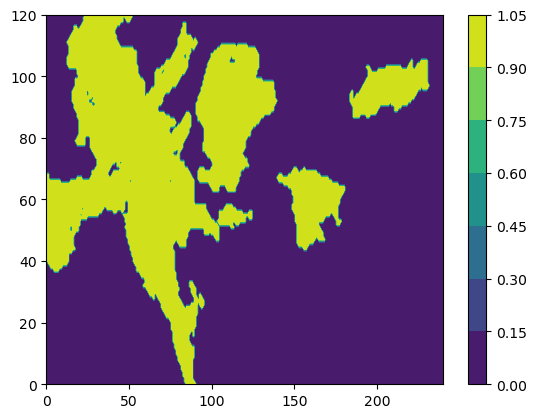

In [1]:
import os
import xarray as xr
import numpy as np

import glob
import os
from netCDF4 import Dataset
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt

import pandas as pd

# Directory where the folders m1997 to m2020 are located
base_directory = ""

# Lon (Y) and Lat (X) ranges
lon_range = (-110, 40)
lat_range = (-30, 30)






from datetime import datetime, timedelta


def convert_precision(april_data):


    output_List = []



    for kkk in range(len(april_data)):




        data_slice = april_data[kkk, :, :]

        indexList = []


        # data_slice = np.array(data_slice)

        # data_slice[data_slice == ''] = '0'

        for i in range(121):
            for j in range(241):

                if (str(data_slice[i][j]) == '--'):

                    indexList.append((i,j))



        for a,b in indexList:

            data_slice[a][b] = -999




        data_slice[data_slice > 0] = 1

        data_slice[data_slice < 0] = 0

        # print(np.min(data_slice))
        # print(np.max(data_slice))

        output_List.append(data_slice)

    return output_List


# Convert '1997 01' to a datetime object
def dateToList(date_str,hours_list):
    date_format = '%Y %m'
    start_date = datetime.strptime(date_str, date_format)

    # Define a list of hours


    # Initialize an empty list to store string representations
    date_strings = []

    # Generate string representations for each hour in the list
    for hours in hours_list:
        new_date = start_date + timedelta(hours=hours)
        date_strings.append(new_date.strftime('%Y-%m-%d %H:%M:%S'))

    # Print the result
    # print("Original Date String:", start_date.strftime('%Y-%m-%d %H:%M:%S'))
    # print("Date Strings for specified hours:", date_strings)

    return date_strings
# Iterate over the folders m1997 to m2020


year = 2020

file = '2020+06_DUOUT_iatp50_3M.nc'


fhadj = Dataset(file, mode='r')

date_name = '2020 06'

print(fhadj.variables.keys())
#hours_list = fhadj.variables['time'][:]





#april_dateList = dateToList(date_name,hours_list)



dufluxu_values = fhadj.variables['shape'][:, (fhadj.variables['lat'][:] >= lat_range[0]) & (fhadj.variables['lat'][:] <= lat_range[1]), (fhadj.variables['lon'][:] >= lon_range[0]) & (fhadj.variables['lon'][:] <= lon_range[1])]
#dufluxv_values = fhadj.variables['DUFLUXV'][:, (fhadj.variables['lat'][:] >= lat_range[0]) & (fhadj.variables['lat'][:] <= lat_range[1]), (fhadj.variables['lon'][:] >= lon_range[0]) & (fhadj.variables['lon'][:] <= lon_range[1])]





result_values =dufluxu_values

april_data = result_values[:,:,:]

true_label = convert_precision(april_data)

data_slice = true_label[96]


import matplotlib.pyplot as plt


# Extract data for April 2015


# Plot contours for every 12th time step






#, data_slice)


print(data_slice)
print(np.min(data_slice))
print(np.max(data_slice))

# Customize the contour plot as needed
plt.contourf(data_slice, cmap='viridis')
plt.colorbar()  # Add colorbar for reference

# Customize plot labels, title, etc. if needed

# Show the plot or save it as an image
plt.show()






#(124, 361 = LAT, 576=LON)

dict_keys(['v10'])
I wnankjfkas
(120, 121, 241)


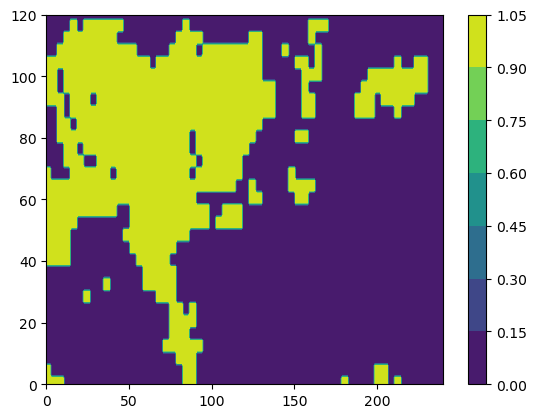

In [2]:
import os
import xarray as xr
import numpy as np

import glob
import os
from netCDF4 import Dataset
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt

# Directory where the folders m1997 to m2020 are located
base_directory = ""

# Lon (Y) and Lat (X) ranges
lon_range = (-110, 40)
lat_range = (-30, 30)






from datetime import datetime, timedelta

# Convert '1997 01' to a datetime object
def dateToList(date_str,hours_list):
    date_format = '%Y %m'
    start_date = datetime.strptime(date_str, date_format)

    # Define a list of hours


    # Initialize an empty list to store string representations
    date_strings = []

    # Generate string representations for each hour in the list
    for hours in hours_list:
        new_date = start_date + timedelta(hours=hours)
        date_strings.append(new_date.strftime('%Y-%m-%d %H:%M:%S'))

    # Print the result
    print("Original Date String:", start_date.strftime('%Y-%m-%d %H:%M:%S'))
    print("Date Strings for specified hours:", date_strings)

    return date_strings
# Iterate over the folders m1997 to m2020


year = 2020

file = '2020-06.nc'


fhadj = Dataset(file, mode='r')

date_name = '2020 06'

print(fhadj.variables.keys())
#hours_list = fhadj.variables['time'][:]





#april_dateList = dateToList(date_name,hours_list)



dufluxu_values = fhadj.variables['v10'][:]
#dufluxv_values = fhadj.variables['DUFLUXV'][:, (fhadj.variables['lat'][:] >= lat_range[0]) & (fhadj.variables['lat'][:] <= lat_range[1]), (fhadj.variables['lon'][:] >= lon_range[0]) & (fhadj.variables['lon'][:] <= lon_range[1])]





result_values = dufluxu_values/1000000

print('I wnankjfkas')
print(result_values.shape)


import matplotlib.pyplot as plt


# Extract data for April 2015
april_data = result_values[:,:,:]

# Plot contours for every 12th time step

predicted_labeles_list = convert_precision(april_data)
data_slice = predicted_labeles_list[96]
# Customize the contour plot as needed
plt.contourf(data_slice, cmap='viridis')
plt.colorbar()  # Add colorbar for reference

# Customize plot labels, title, etc. if needed

# Show the plot or save it as an image
plt.show()






#(124, 361 = LAT, 576=LON)

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np




true_label1 = np.array(true_label)
predicted_label1 = np.array(predicted_labeles_list)

print(true_label1[0].shape)
_,R,C = true_label1.shape
precision_array = np.zeros((true_label1[0].shape))
recall_array = np.zeros((true_label1[0].shape))
f1score_array = np.zeros((true_label1[0].shape))
accuracy_array = np.zeros((true_label1[0].shape))

tp_tp_tn = np.zeros((true_label1[0].shape))



def calculate_tp_tn(y_true, y_pred):
    # Ensure the labels are binary (0 and 1)
    y_true_binary = np.where(y_true > 0, 1, 0)
    y_pred_binary = np.where(y_pred > 0, 1, 0)

    # True Positives (TP)
    tp = np.sum((y_true_binary == 1) & (y_pred_binary == 1))

    # True Negatives (TN)
    tn = np.sum((y_true_binary == 0) & (y_pred_binary == 0))

    return tp, tn



for i in range(R):
    for j in range(C):

        true_label_ll = true_label1[:,i,j]
        predicted_label_ll = predicted_label1[:,i,j]

        precision_array[i][j] = precision_score(true_label_ll,predicted_label_ll)
        recall_array[i][j] = recall_score(true_label_ll,predicted_label_ll)
        f1score_array[i][j] = f1_score(true_label_ll,predicted_label_ll)
        accuracy_array[i][j] = accuracy_score(true_label_ll,predicted_label_ll)

        tp, tn = calculate_tp_tn(true_label_ll,predicted_label_ll)

        tp_tp_tn[i][j] = tp/(tp+tn)



from sklearn.metrics import roc_curve, auc
import numpy as np




def calculate_roc_auc1(true_label, predicted_label):
    _, R, C = true_label.shape
    roc_auc_array = np.zeros((R, C))

    for i in range(R):
        for j in range(C):
            true_label_ll = true_label[:, i, j]
            predicted_label_ll = predicted_label[:, i, j]

            fpr, tpr, thresholds = roc_curve(true_label_ll, predicted_label_ll)

            #print(fpr,tpr)
            roc_auc_array[i][j] = auc(fpr, tpr)
    roc_auc_array = np.nan_to_num(roc_auc_array)

    return roc_auc_array

# Example usage
true_label = np.array(true_label)
predicted_label = np.array(predicted_labeles_list)

roc_auc_scores = calculate_roc_auc1(true_label, predicted_label)


(121, 241)


/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedM

In [4]:
from sklearn.metrics import roc_curve, auc
import numpy as np

def calculate_roc_auc(true_label, predicted_label):
    _, R, C = true_label.shape
    #roc_auc_array = np.zeros((R, C))
    fpr_list = []
    tpr_list = []

    for i in range(R):
        for j in range(C):
            true_label_ll = true_label[:, i, j]
            predicted_label_ll = predicted_label[:, i, j]


            # print(np.sum(true_label_ll))
            # print(np.sum(predicted_label_ll))

            fpr, tpr, thresholds = roc_curve(true_label_ll, predicted_label_ll)

            # Find valid indices where neither fpr nor tpr are NaN


            tpr_list.append(tpr)



            fpr_list.append(fpr)




    #roc_auc_array = np.nan_to_num(roc_auc_array)

    return fpr_list, tpr_list

# Example usage
true_label = np.array(true_label)
predicted_label = np.array(predicted_labeles_list)

fpr_list, tpr_list = calculate_roc_auc(true_label, predicted_label)




#print(fpr_list)

print(len(fpr_list))

#print(tpr_list)

print(len(tpr_list))


tpr_new_list = []
for t in tpr_list:

    if(np.isnan(t[0])):
        continue
    elif t.shape[0] == 3:
        tpr_new_list.append(t)


fpr_new_list = []
for t in fpr_list:

    if(np.isnan(t[0])):
        continue

    elif t.shape[0] == 3:
        fpr_new_list.append(t)



print(tpr_new_list)
print(len(tpr_new_list))
print(fpr_new_list)
print(len(fpr_new_list))


np.savetxt('tpr_cmad.txt', tpr_new_list, delimiter='\t', fmt='%.8f')
np.savetxt('fpr_cmad.txt', fpr_new_list, delimiter='\t', fmt='%.8f')


/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  

29161
29161
[array([0., 1., 1.]), array([0., 1., 1.]), array([0., 1., 1.]), array([0., 1., 1.]), array([0., 1., 1.]), array([0., 1., 1.]), array([0., 1., 1.]), array([0., 1., 1.]), array([0., 1., 1.]), array([0., 1., 1.]), array([0., 1., 1.]), array([0. , 0.5, 1. ]), array([0. , 0.5, 1. ]), array([0. , 0.5, 1. ]), array([0., 1., 1.]), array([0., 1., 1.]), array([0.        , 0.66666667, 1.        ]), array([0.        , 0.57142857, 1.        ]), array([0.        , 0.71428571, 1.        ]), array([0.        , 0.71428571, 1.        ]), array([0.        , 0.71428571, 1.        ]), array([0.        , 0.71428571, 1.        ]), array([0., 1., 1.]), array([0., 1., 1.]), array([0.        , 0.91666667, 1.        ]), array([0.  , 0.75, 1.  ]), array([0.        , 0.76923077, 1.        ]), array([0.        , 0.88888889, 1.        ]), array([0.        , 0.88888889, 1.        ]), array([0.        , 0.83333333, 1.        ]), array([0.        , 0.91666667, 1.        ]), array([0. , 0.9, 1. ]), array([0.

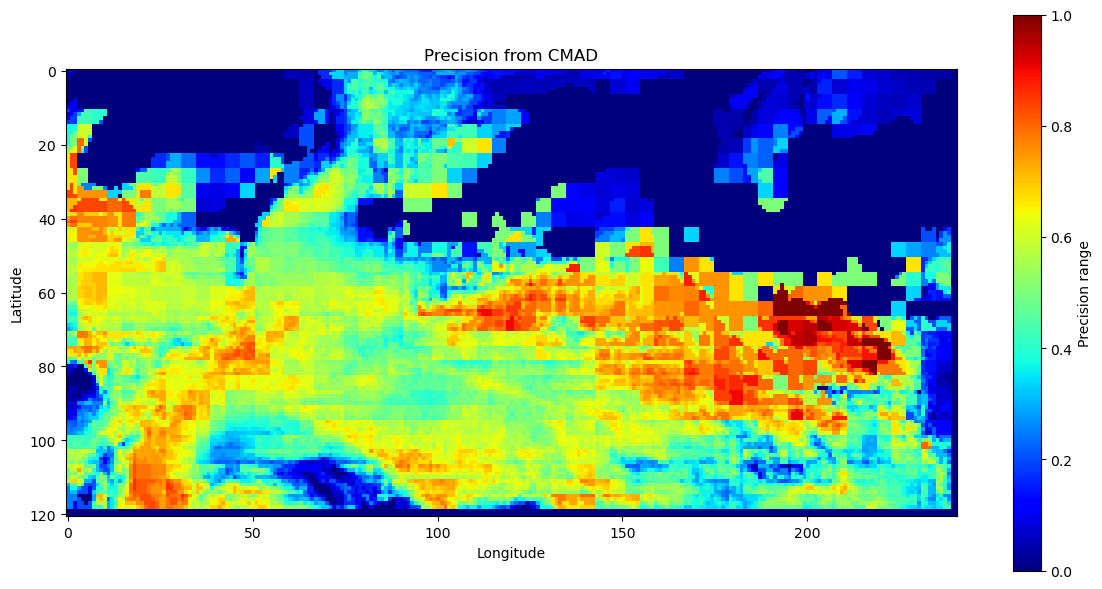

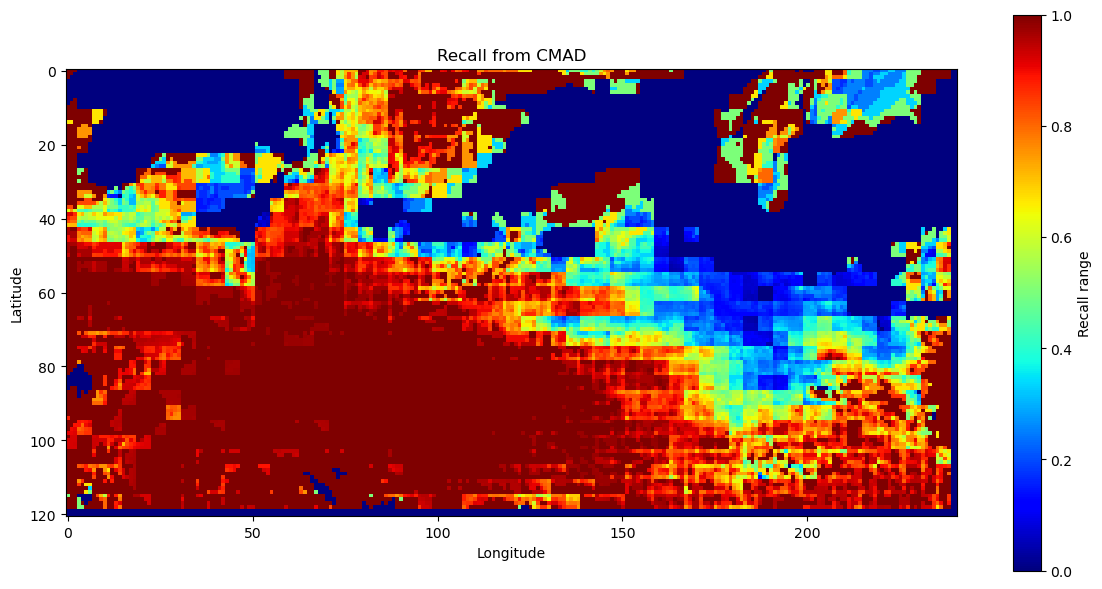

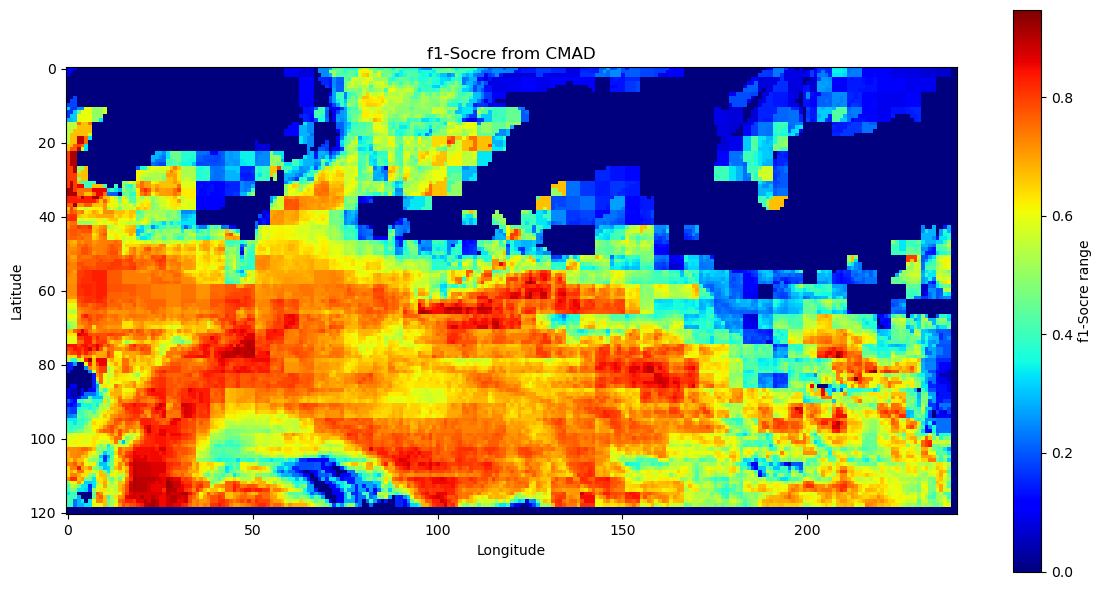

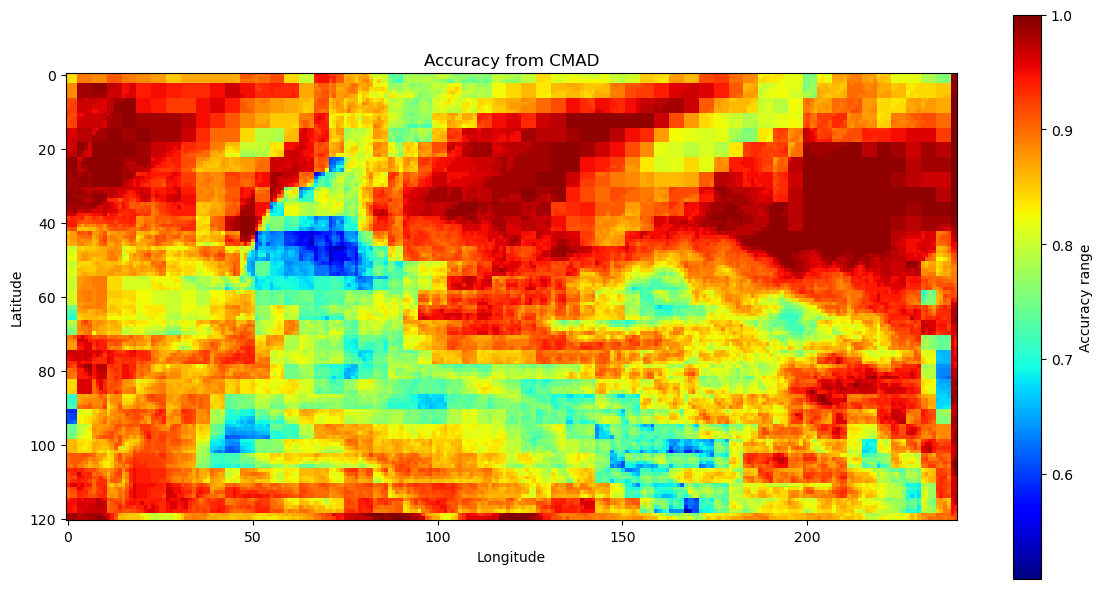

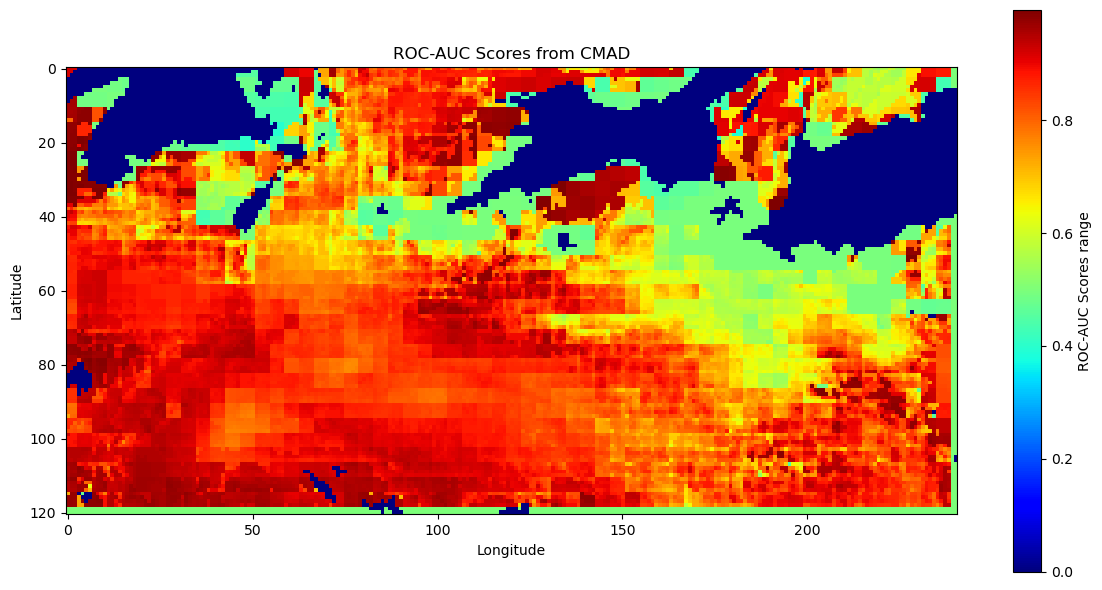

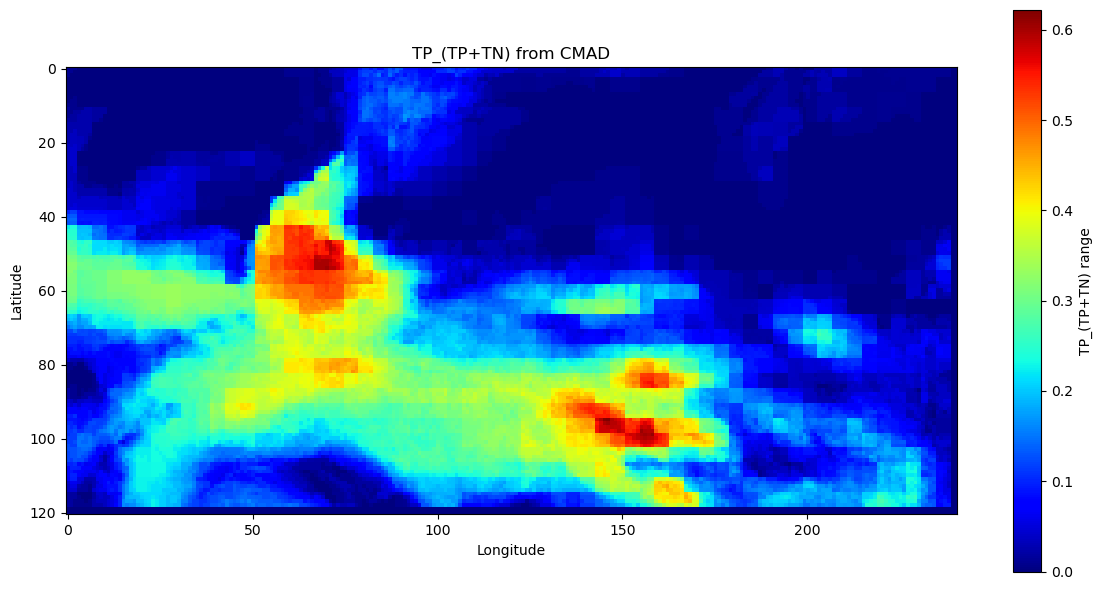

In [5]:
np.savetxt('precision_array.txt', precision_array,delimiter='\t',fmt='%.4f')
np.savetxt('recall_array.txt', recall_array,delimiter='\t',fmt='%.4f')
np.savetxt('f1score_array.txt', f1score_array,delimiter='\t',fmt='%.4f')
np.savetxt('accuracy_array.txt', accuracy_array,delimiter='\t',fmt='%.4f')
np.savetxt('roc_auc_score.txt', roc_auc_scores,delimiter='\t',fmt='%.4f')
np.savetxt('tp_tp_tn.txt', tp_tp_tn,delimiter='\t',fmt='%.4f')


def diffrentfigure(anomaly_map,name):
    plt.figure(figsize=(12, 6))
    plt.imshow(anomaly_map, cmap='jet', interpolation='nearest')
    cbar = plt.colorbar(label=name+' range')
    plt.title(name+' from CMAD')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()

    plt.savefig(name + '.png')

diffrentfigure(precision_array,'Precision')
diffrentfigure(recall_array,'Recall')
diffrentfigure(f1score_array,'f1-Socre')
diffrentfigure(accuracy_array,'Accuracy')
diffrentfigure(roc_auc_scores,'ROC-AUC Scores')
diffrentfigure(tp_tp_tn,'TP_(TP+TN)')

In [6]:
import matplotlib.pyplot as plt


lat=lat#pm[140:180]
trend1=trend#[140:180,:]
fig = plt.figure(figsize = (10,10))
#plt.subplot(1,1,1)
projection = ccrs.PlateCarree(central_longitude=0.0)
ax = plt.axes(projection = projection)
#ax.set_xticks(np.linspace(-180,180,5) , crs=projection)
#ax.set_yticks(np.linspace(-90,90,5), crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
img=plt.contourf(lonpm,lat,
              np.clip(trend1,a_min =-0.005,a_max = 0.005),vmin=-0.005, vmax=0.005,
              transform=ccrs.PlateCarree(),levels=90,
              cmap = 'seismic',
            )
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
#ax.gridlines()
plt.ylabel('Latitude',fontsize = 27)
plt.xlabel('Longitude',fontsize = 27)
plt.yticks(fontsize = 21)
plt.xticks(fontsize = 21)
plt.title('Trend in LWup_Clear Sky_Sfc_Jan(2000-2022)',fontsize = 21)

#plt.colorbar(img,fraction=0.02, pad=0.02)
cbar=plt.colorbar(fraction=0.005, pad=0.02,orientation='vertical')
cbar.set_ticks([-0.005,-0.0025,0,0.0025,0.005])
cbar.set_ticklabels([-0.005,-0.0025,0,0.0025,0.005])
cbar.ax.tick_params(labelsize=15)

NameError: name 'lat' is not defined

In [ ]:
file = 'result_data_1997_2020.nc'
fhadj = Dataset(file, mode='r')


v10 = fhadj.variables['v10'][:]

time = fhadj.variables['tme'][:]